# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [3]:
data = pd.read_csv('Categorical.csv')
data

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


Remove the duplicate index column from the dataset. 

## Map the data

Use the <i>'continent'</i> category for this analysis.

In [4]:
data_mapped = data.copy()
data_mapped['continent'] = data_mapped['continent'].map({'Africa':1,'North America':2,'Asia':3,'Europe':4,
                                                         'Oceania':5,'Antarctica':6,'South America':7,
                                                         'Seven seas (open ocean)':8})
                                                
data_mapped

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,2
1,Afghanistan,66.004734,33.835231,3
2,Angola,17.537368,-12.293361,1
3,Anguilla,-63.064989,18.223959,2
4,Albania,20.049834,41.142450,4
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,3
238,South Africa,25.083901,-29.000341,1
239,Zambia,27.774759,-13.458242,1


In [5]:
y = list(data['continent'])
y

['North America',
 'Asia',
 'Africa',
 'North America',
 'Europe',
 'Europe',
 'Europe',
 'Asia',
 'South America',
 'Asia',
 'Oceania',
 'Antarctica',
 'Oceania',
 'Seven seas (open ocean)',
 'North America',
 'Oceania',
 'Europe',
 'Asia',
 'Africa',
 'Europe',
 'Africa',
 'Africa',
 'Asia',
 'Europe',
 'Asia',
 'North America',
 'North America',
 'Europe',
 'North America',
 'Europe',
 'North America',
 'North America',
 'South America',
 'South America',
 'North America',
 'Asia',
 'Asia',
 'Africa',
 'Africa',
 'Europe',
 'South America',
 'Asia',
 'Africa',
 'Africa',
 'Africa',
 'Africa',
 'Oceania',
 'South America',
 'Africa',
 'Africa',
 'North America',
 'North America',
 'North America',
 'North America',
 'Asia',
 'Asia',
 'Europe',
 'Europe',
 'Africa',
 'North America',
 'Europe',
 'North America',
 'Africa',
 'South America',
 'Africa',
 'Africa',
 'Europe',
 'Europe',
 'Africa',
 'Europe',
 'Oceania',
 'South America',
 'Europe',
 'Europe',
 'Oceania',
 'Africa',
 'Eur


## Select the features

In [6]:
x = data_mapped.iloc[:,1:4]
x

,Longitude,Latitude,continent
0,-69.982677,12.520880,2
1,66.004734,33.835231,3
2,17.537368,-12.293361,1
3,-63.064989,18.223959,2
4,20.049834,41.142450,4
...,...,...,...
236,-172.164851,-13.753243,5
237,47.586762,15.909280,3
238,25.083901,-29.000341,1
239,27.774759,-13.458242,1


## Clustering

Use 4 clusters initially.

In [20]:
kmeans = KMeans(50)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [21]:
identified = kmeans.fit_predict(x)

In [22]:
data_with_cluster = data_mapped.copy()
data_with_cluster['Cluster'] = identified
data_with_cluster

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,2,38
1,Afghanistan,66.004734,33.835231,3,22
2,Angola,17.537368,-12.293361,1,7
3,Anguilla,-63.064989,18.223959,2,38
4,Albania,20.049834,41.142450,4,14
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,33
237,Yemen,47.586762,15.909280,3,23
238,South Africa,25.083901,-29.000341,1,7
239,Zambia,27.774759,-13.458242,1,7


## Plot the data

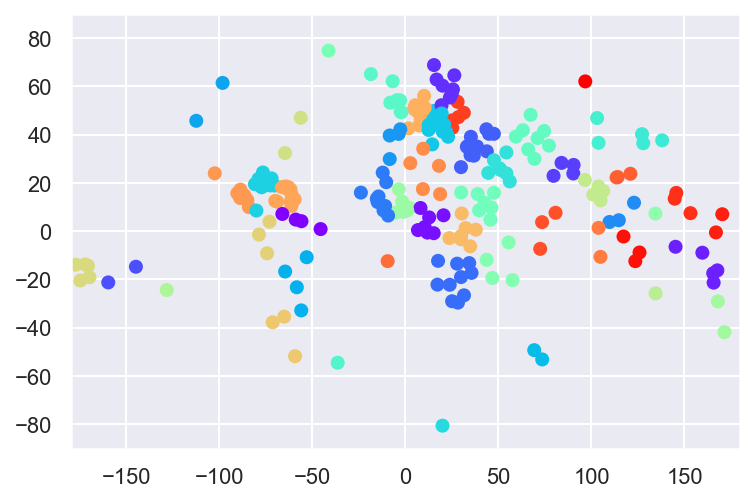

In [23]:
plt.scatter(data['Longitude'],data['Latitude'],c = data_with_cluster['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### Choosing the number of clusters

In [13]:
data_with_cluster.describe(include = 'all')

,name,Longitude,Latitude,continent,Cluster
count,241,241.000000,241.000000,241.000000,241.000000
unique,241,NaN,NaN,NaN,NaN
top,Belize,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,14.215380,17.169377,3.195021,3.107884
std,NaN,72.013654,26.554014,1.834659,2.092840
min,NaN,-177.348348,-80.508579,1.000000,0.000000
25%,NaN,-36.433184,1.358761,2.000000,1.000000
50%,NaN,18.644925,17.277500,3.000000,3.000000
75%,NaN,47.587005,39.115541,4.000000,5.000000


In [15]:
max_clusters = data_with_cluster['name'].count()
max_clusters

241

In [18]:
wcss = []

for k in range(1, 242):
    kmeans = KMeans(k)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[1414667.5138593237,
 657808.5172248426,
 325960.9914932279,
 257323.10257977646,
 192927.7576950448,
 152247.0363826667,
 127441.57833639815,
 103466.67090668235,
 85505.63453296036,
 76905.91634516258,
 70743.09700340568,
 63574.143633471074,
 59355.352764621566,
 54293.09045341953,
 50665.61234318575,
 47225.523160812896,
 44765.468422043734,
 42167.19728254697,
 39810.04376162206,
 36728.27887036208,
 34992.390740143135,
 32725.615358726034,
 30622.198820252834,
 29268.05700173379,
 27272.84510337561,
 25734.0352465944,
 24857.518624323442,
 23188.16874197329,
 22044.834298525588,
 20631.11951652221,
 19991.755637713482,
 18914.083485705873,
 18750.48781431496,
 17135.798847370126,
 16465.3358779834,
 16149.884831994801,
 15313.418440452971,
 14472.078525775189,
 13984.806107003042,
 13856.352279199817,
 13556.323599722686,
 12169.610660259958,
 11652.005581331308,
 11781.955749942977,
 10983.048539565905,
 10607.07285646152,
 10637.62623795712,
 10270.549674821727,
 9892.234858350

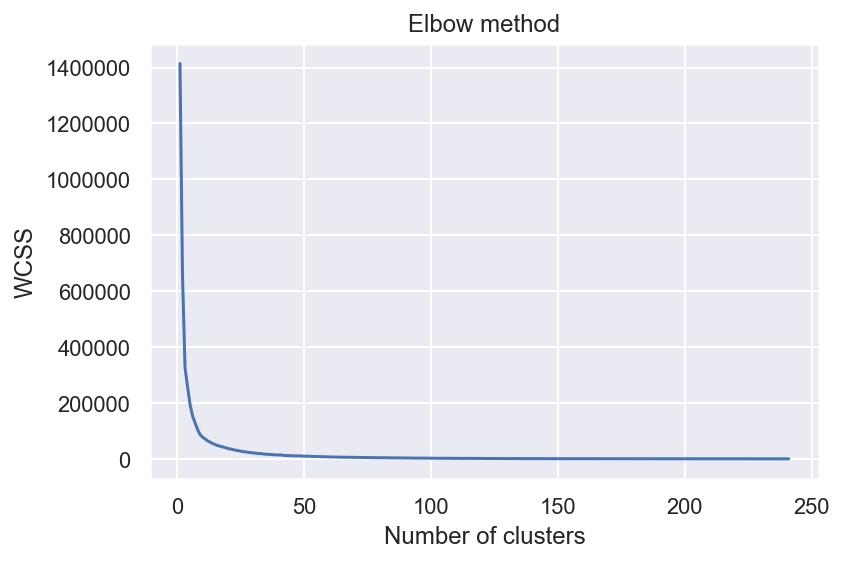

In [19]:
num_clusters = list(range(1,242))
plt.plot(num_clusters,wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()